# 1. Data Preparation:

In [1]:

import pandas as pd
df = pd.read_excel('D:\\Data science\\assignments\\heart_disease.xlsx',sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


# 2. Exploratory Data Analysis (EDA):

In [2]:
# check for zeros
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [3]:
# Calculate descriptive statistics
df.describe()


,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


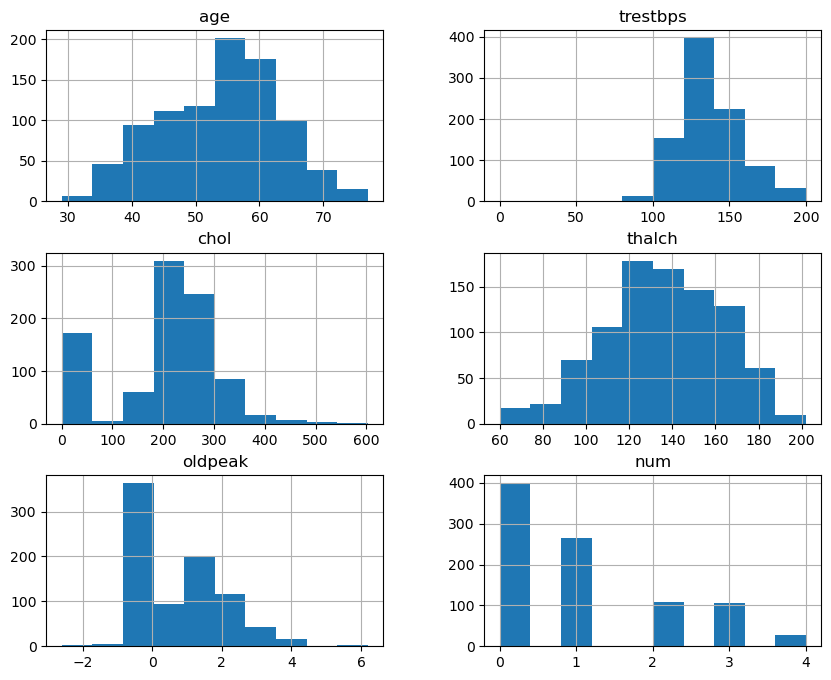

In [4]:
# Visualize the distribution of features


# Histogram

import matplotlib.pyplot as plt

df.hist(figsize=(10,8))
plt.show()

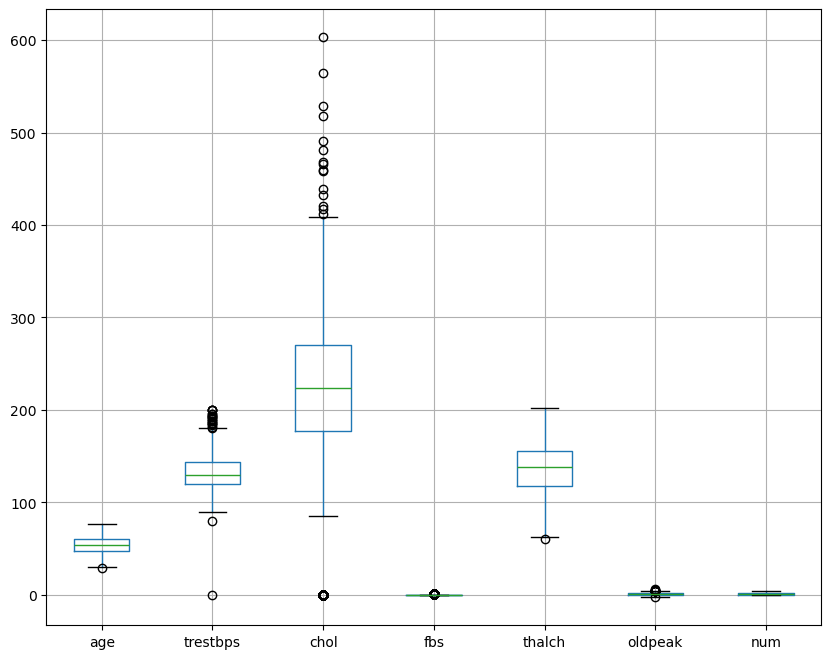

In [5]:
# Boxplot

df.boxplot(figsize=(10,8))
plt.show()

In [6]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Correlation matrix for numerical variables
df[numerical_columns].corr()

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,-0.328088,0.242662,0.326493
trestbps,0.253999,1.000000,0.117488,-0.133360,0.167131,0.137251
chol,-0.099967,0.117488,1.000000,0.197907,0.029898,-0.238813
thalch,-0.328088,-0.133360,0.197907,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.167131,0.029898,-0.139598,1.000000,0.437577
num,0.326493,0.137251,-0.238813,-0.323058,0.437577,1.000000


# 3. Feature Engineering:

In [7]:
# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(df.select_dtypes(include=['int64', 'float64']))

# Handling missing values
df.fillna(df.mean(), inplace=True)

# checking for Handling missing values
df.isnull().sum()



age                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
oldpeak                     0
num                         0
sex_Male                    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
exang_FALSE                 0
exang_TURE                  0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

# 4. Decision Tree Classification:

In [8]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the target variable to integers (if it's categorical)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Implement a Decision Tree Classification model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr') 

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7692307692307693
Precision: 0.7955037165563481
Recall: 0.7692307692307693
F1 Score: 0.7810549579038325
ROC AUC Score: 0.5397580769573845


# 5. Hyperparameter Tuning:

In [9]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr') 

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.8571428571428571
Precision: 0.7837213633823803
Recall: 0.8571428571428571
F1 Score: 0.8145158413015556
ROC AUC Score: 0.563297573951648


C:\Users\gmani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 6. Model Evaluation and Analysis:

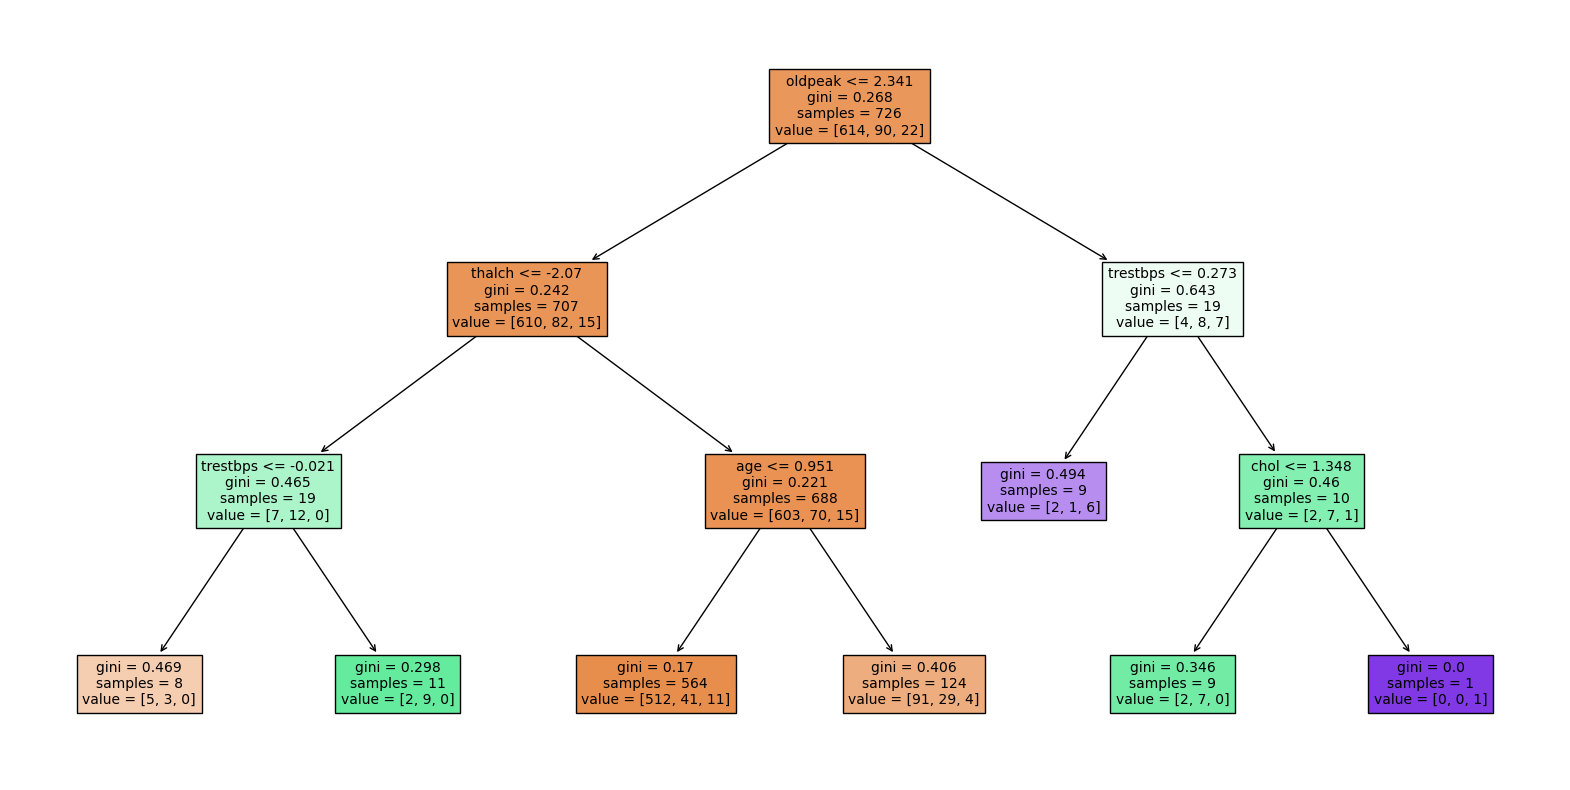

Number of nodes: 13
Maximum depth: 3


In [20]:

# Visualize the decision tree structure
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(best_model, feature_names=X.columns, fontsize=10, filled=True)
plt.show()

# Count the number of nodes in the decision tree
n_nodes = best_model.tree_.node_count

# Count the depth of the decision tree
max_depth = best_model.tree_.max_depth

# Print the results
print("Number of nodes:", n_nodes)
print("Maximum depth:", max_depth)


In [21]:

# Identify important features

importances = best_model.feature_importances_
features = X.columns

for i, feature in enumerate(features):
    print(f"{feature}: {importances[i]}")



age: 0.1685845206889625
trestbps: 0.14661953389195212
chol: 0.04378737387488348
fbs: 0.0
thalch: 0.2932495661979172
oldpeak: 0.3477590053462847
sex_Male: 0.0
cp_atypical angina: 0.0
cp_non-anginal: 0.0
cp_typical angina: 0.0
restecg_normal: 0.0
restecg_st-t abnormality: 0.0
exang_True: 0.0
exang_FALSE: 0.0
exang_TURE: 0.0
slope_flat: 0.0
slope_upsloping: 0.0
thal_normal: 0.0
thal_reversable defect: 0.0


In [22]:

# Analyze the performance of the Decision Tree model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')
print("ROC AUC Score:", roc_auc)


Accuracy: 0.8571428571428571
Precision: 0.7837213633823803
Recall: 0.8571428571428571
F1 Score: 0.8145158413015556
ROC AUC Score: 0.563297573951648


C:\Users\gmani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Interview Questions:

In [ ]:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?


Some common hyperparameters of decision tree models include:

* max_depth: This parameter controls the maximum depth of the tree. 
* min_samples_split: This parameter controls the minimum number of samples required to split an internal node.
* criterion: This parameter specifies the function used to evaluate the quality of a split.

affect model performance:

* max_depth: Increasing `max_depth` can improve accuracy but also increase the risk of overfitting.
* min_samples_split: Increasing `min_samples_split` can reduce the risk of overfitting but also potentially lead to underfitting.
* criterion: The choice of criterion can affect the performance of the model on different types of data.

2. What is the difference between the Label encoding and One-hot encoding?

* Label encoding:This method assigns a numerical value to each distinct category in a categorical variable. 
    For example, the categories "male" and "female" could be encoded as 0 and 1, respectively.
    
* One-hot encoding:This method creates a new binary feature for each distinct category in a categorical variable. 
    For example, the categories "male" and "female" would be encoded as two new features, "male" and "female", with values of 1 and 0, respectively.



